In [1]:
# !pip install seaborn


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


csv_file = 'average_time.csv' 
df = pd.read_csv(csv_file)


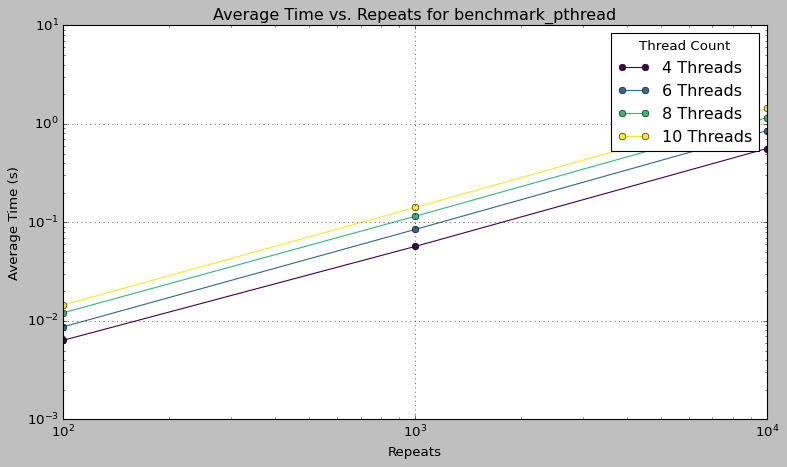

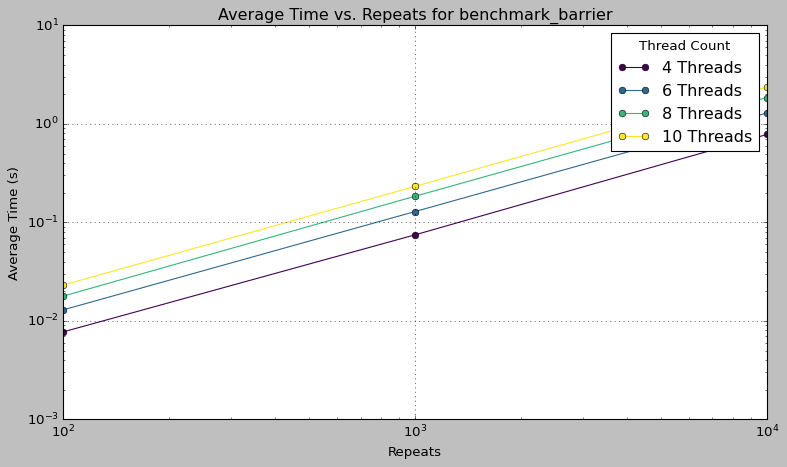

In [38]:

df['Average_Time(s)'] = df['Average_Time(s)'].astype(float)
df['Threads'] = df['Threads'].astype(int)
df['Repeats'] = df['Repeats'].astype(int)

plt.style.use('classic')


programs = df['Program'].unique()
thread_counts = sorted(df['Threads'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(thread_counts)))

for program in programs:
    plt.figure(figsize=(10, 6))
    for idx, threads in enumerate(thread_counts):
        subset = df[(df['Program'] == program) & (df['Threads'] == threads)]
        plt.plot(subset['Repeats'], subset['Average_Time(s)'], marker='o', color=colors[idx], label=f'{threads} Threads')
    plt.title(f'Average Time vs. Repeats for {program}')
    plt.xlabel('Repeats')
    plt.ylabel('Average Time (s)')
    plt.legend(title='Thread Count')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



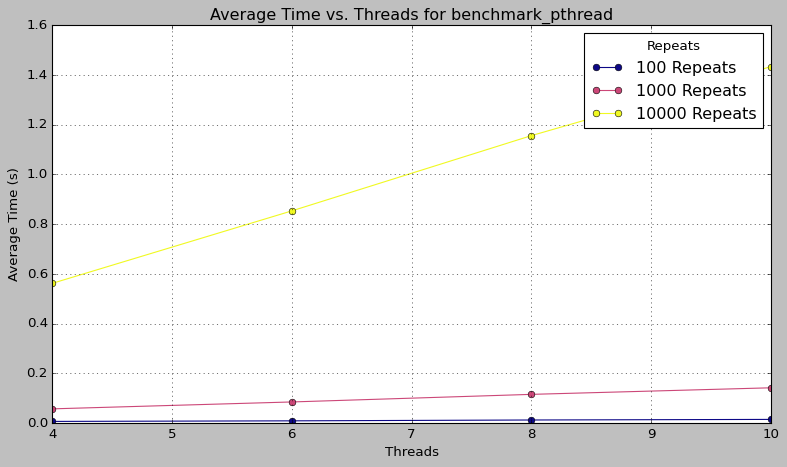

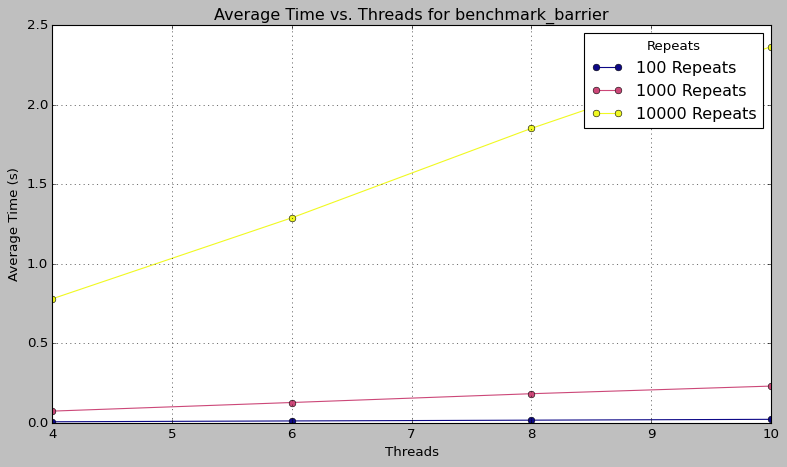

In [39]:


repeat_counts = sorted(df['Repeats'].unique())
colors = plt.cm.plasma(np.linspace(0, 1, len(repeat_counts)))

for program in programs:
    plt.figure(figsize=(10, 6))
    for idx, repeats in enumerate(repeat_counts):
        subset = df[(df['Program'] == program) & (df['Repeats'] == repeats)]
        plt.plot(subset['Threads'], subset['Average_Time(s)'], marker='o', color=colors[idx], label=f'{repeats} Repeats')
    plt.title(f'Average Time vs. Threads for {program}')
    plt.xlabel('Threads')
    plt.ylabel('Average Time (s)')
    plt.legend(title='Repeats')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


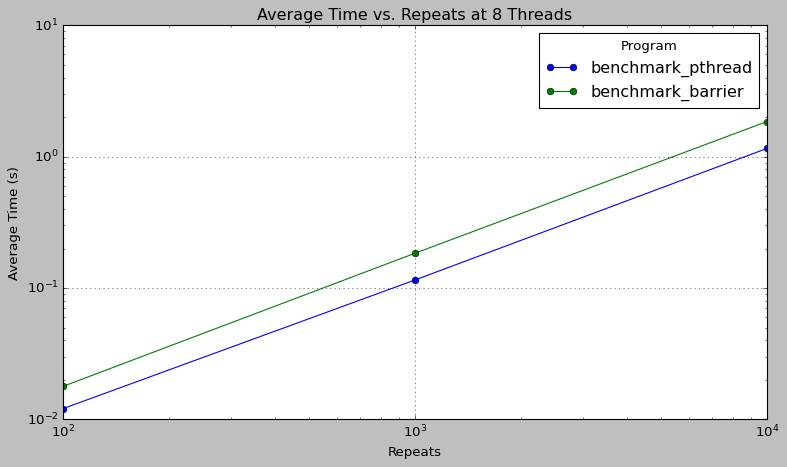

In [40]:

fixed_threads = 8  
subset = df[df['Threads'] == fixed_threads]

plt.figure(figsize=(10, 6))
for program in programs:
    program_data = subset[subset['Program'] == program]
    plt.plot(program_data['Repeats'], program_data['Average_Time(s)'], marker='o', label=program)
plt.title(f'Average Time vs. Repeats at {fixed_threads} Threads')
plt.xlabel('Repeats')
plt.ylabel('Average Time (s)')
plt.legend(title='Program')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()